<a href="https://colab.research.google.com/github/mentheshreya/Machine-Learning-Lab/blob/main/ML_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Shreya Menthe
# PRN: 124B2B003

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm
from sklearn.neighbors import NearestNeighbors

In [ ]:
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
feature_names = cancer.feature_names

print(f"Dataset shape: {X.shape}")
print(f"Number of target classes: {len(np.unique(y))}")

Dataset shape: (569, 30)
Number of target classes: 2


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print("PCA (2 Components) Calculated for Visualization")

PCA (2 Components) Calculated for Visualization


In [ ]:
n_clusters_known = 2
print("\n K-Means Optimal Cluster Search ")
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans_labels_loop = kmeans.fit_predict(X_scaled)
    print(f"\nNumber of Clusters: {i}")
    print(f"  Silhouette Score: {silhouette_score(X_scaled, kmeans_labels_loop)}")
    print(f"  Calinski-Harabasz Score: {calinski_harabasz_score(X_scaled, kmeans_labels_loop)}")
    print(f"  Davies-Bouldin Score: {davies_bouldin_score(X_scaled, kmeans_labels_loop)}")


 K-Means Optimal Cluster Search 

Number of Clusters: 2
  Silhouette Score: 0.34338224069077816
  Calinski-Harabasz Score: 267.6917158605383
  Davies-Bouldin Score: 1.3205098372342035

Number of Clusters: 3
  Silhouette Score: 0.3143840098608098
  Calinski-Harabasz Score: 197.1140002277671
  Davies-Bouldin Score: 1.5293883767807952

Number of Clusters: 4
  Silhouette Score: 0.28330544840954164
  Calinski-Harabasz Score: 158.88059720435191
  Davies-Bouldin Score: 1.4894383053016074

Number of Clusters: 5
  Silhouette Score: 0.15821041754355697
  Calinski-Harabasz Score: 140.22040276812453
  Davies-Bouldin Score: 1.7560130714033817

Number of Clusters: 6
  Silhouette Score: 0.16036705901249523
  Calinski-Harabasz Score: 128.5566341742521
  Davies-Bouldin Score: 1.719691068602122

Number of Clusters: 7
  Silhouette Score: 0.1531863694446859
  Calinski-Harabasz Score: 118.37874734969753
  Davies-Bouldin Score: 1.6772457207809086

Number of Clusters: 8
  Silhouette Score: 0.147194589755308

In [ ]:
kmeans_final = KMeans(n_clusters=n_clusters_known, random_state=42, n_init=10)
kmeans_labels = kmeans_final.fit_predict(X_scaled)
print(f"\nK-Means applied with {n_clusters_known} clusters ")


K-Means applied with 2 clusters 



K-Means PCA plot saved as kmeans_pca_plot.png


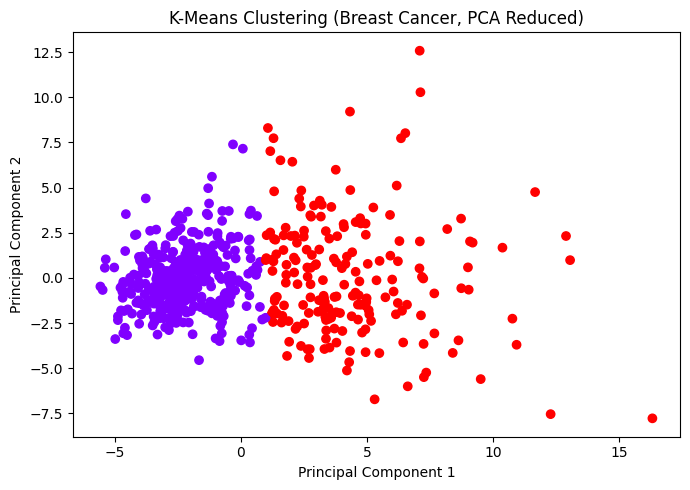

In [ ]:
plt.figure(figsize=(7, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='rainbow')
plt.title('K-Means Clustering (Breast Cancer, PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.savefig("kmeans_pca_plot.png")
print("\nK-Means PCA plot saved as kmeans_pca_plot.png")

In [ ]:
print("\nFinal K-Means Evaluation (2 Clusters) ")
print(f"Silhouette Score: {silhouette_score(X_scaled, kmeans_labels)}")
print(f"Calinski-Harabasz Score: {calinski_harabasz_score(X_scaled, kmeans_labels)}")
print(f"Davies-Bouldin Score: {davies_bouldin_score(X_scaled, kmeans_labels)}")


Final K-Means Evaluation (2 Clusters) 
Silhouette Score: 0.34338224069077816
Calinski-Harabasz Score: 267.6917158605383
Davies-Bouldin Score: 1.3205098372342035



--- Generating K-Means Silhouette Plot ---
Silhouette plot saved as kmeans_silhouette_plot.png


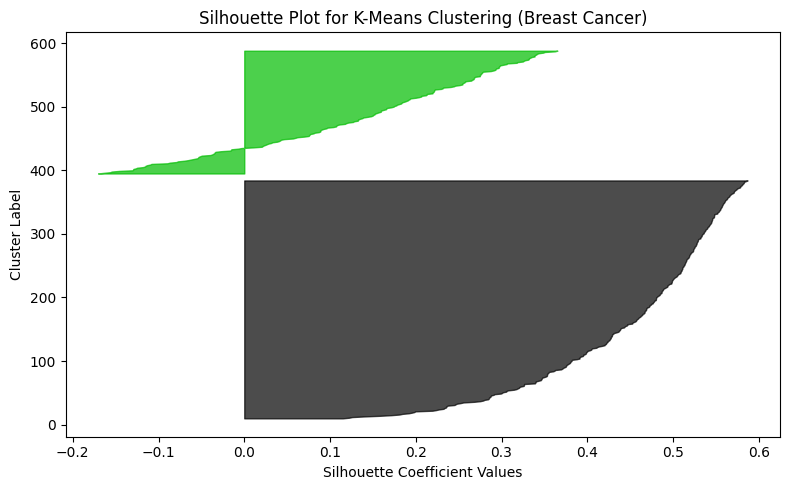

In [ ]:
print("\n--- Generating K-Means Silhouette Plot ---")
sil_vals = silhouette_samples(X_scaled, kmeans_labels)
y_lower = 10
plt.figure(figsize=(8, 5))

for i in range(n_clusters_known):
    ith_cluster_sil_vals = sil_vals[kmeans_labels == i]
    ith_cluster_sil_vals.sort()
    size_cluster_i = ith_cluster_sil_vals.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / n_clusters_known)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_vals,
                      facecolor=color, edgecolor=color, alpha=0.7)
    y_lower = y_upper + 10

plt.xlabel("Silhouette Coefficient Values")
plt.ylabel("Cluster Label")
plt.title("Silhouette Plot for K-Means Clustering (Breast Cancer)")
plt.tight_layout()
plt.savefig("kmeans_silhouette_plot.png")
print("Silhouette plot saved as kmeans_silhouette_plot.png")

In [ ]:
print("\nHierarchical Optimal Cluster Search")
for i in range(2, 10):
    hc = AgglomerativeClustering(n_clusters=i, linkage='ward')
    hc_labels_loop = hc.fit_predict(X_scaled)
    print(f"\nNumber of Clusters: {i}")
    print(f"  Silhouette Score: {silhouette_score(X_scaled, hc_labels_loop)}")
    print(f"  Calinski-Harabasz Score: {calinski_harabasz_score(X_scaled, hc_labels_loop)}")
    print(f"  Davies-Bouldin Score: {davies_bouldin_score(X_scaled, hc_labels_loop)}")


Hierarchical Optimal Cluster Search

Number of Clusters: 2
  Silhouette Score: 0.33938477753669855
  Calinski-Harabasz Score: 248.62884061078907
  Davies-Bouldin Score: 1.369963541894103

Number of Clusters: 3
  Silhouette Score: 0.33009721062922587
  Calinski-Harabasz Score: 182.17394580771122
  Davies-Bouldin Score: 1.556389937521331

Number of Clusters: 4
  Silhouette Score: 0.2981990434923712
  Calinski-Harabasz Score: 138.09049053268672
  Davies-Bouldin Score: 1.4848329611949305

Number of Clusters: 5
  Silhouette Score: 0.24340428427139352
  Calinski-Harabasz Score: 116.7350447376558
  Davies-Bouldin Score: 1.6247164235551501

Number of Clusters: 6
  Silhouette Score: 0.11994019653667852
  Calinski-Harabasz Score: 104.965035446527
  Davies-Bouldin Score: 2.043142596143826

Number of Clusters: 7
  Silhouette Score: 0.1237788560215736
  Calinski-Harabasz Score: 96.90980822726503
  Davies-Bouldin Score: 1.840706733482347

Number of Clusters: 8
  Silhouette Score: 0.0962220060522099


Generating Dendrogram 


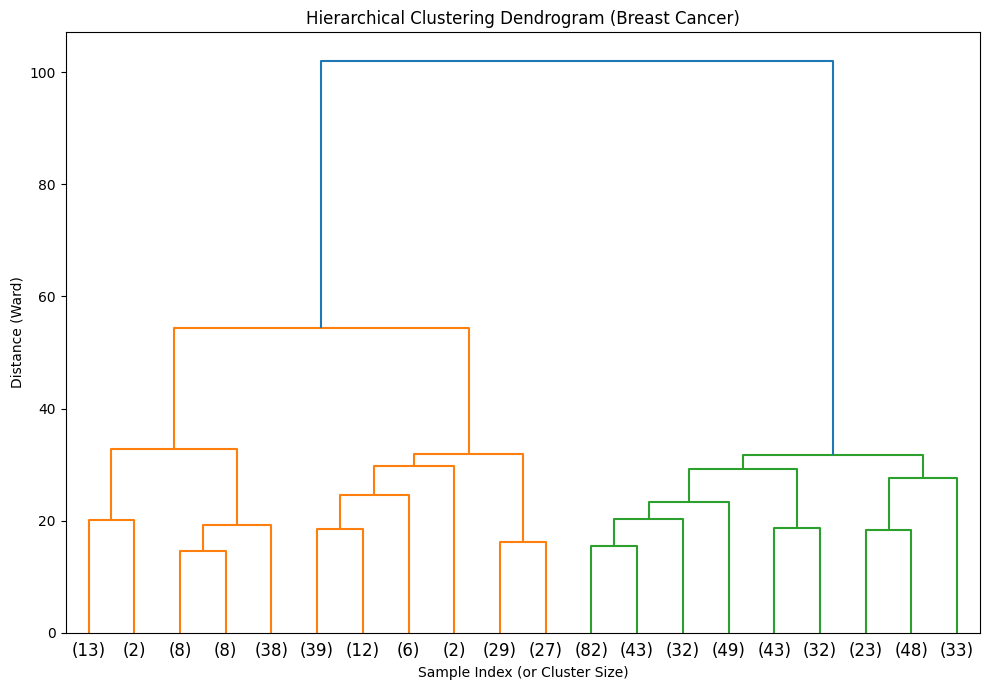

In [ ]:
print("\nGenerating Dendrogram ")
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True,
           truncate_mode='lastp',
           p=20)
plt.title('Hierarchical Clustering Dendrogram (Breast Cancer)')
plt.xlabel('Sample Index (or Cluster Size)')
plt.ylabel('Distance (Ward)')
plt.tight_layout()


In [ ]:
hc_labels = fcluster(linked, t=n_clusters_known, criterion='maxclust')
print(f"\nCluster labels for first 10 samples (Hierarchical): {hc_labels[:10]}")


Cluster labels for first 10 samples (Hierarchical): [2 2 2 2 2 2 2 2 2 2]


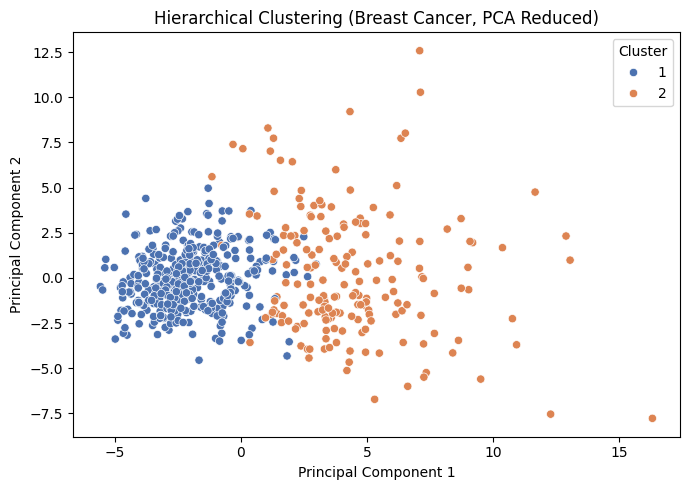

In [ ]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=hc_labels, palette='deep')
plt.title('Hierarchical Clustering (Breast Cancer, PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.tight_layout()



In [ ]:
print("\n--- Final Hierarchical Clustering Evaluation (2 Clusters) ---")
print(f"Silhouette Score: {silhouette_score(X_scaled, hc_labels)}")
print(f"Calinski-Harabasz Score: {calinski_harabasz_score(X_scaled, hc_labels)}")
print(f"Davies-Bouldin Score: {davies_bouldin_score(X_scaled, hc_labels)}")


--- Final Hierarchical Clustering Evaluation (2 Clusters) ---
Silhouette Score: 0.33938477753669855
Calinski-Harabasz Score: 248.62884061078907
Davies-Bouldin Score: 1.369963541894103


In [ ]:
# Self Learning (Optics clustering)
from sklearn.cluster import OPTICS
simple_optics = OPTICS(min_samples=20, eps=4.5, cluster_method='dbscan')
labels = simple_optics.fit_predict(X_scaled)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print(f"Estimated number of clusters: {n_clusters_}")
print(f"Estimated number of noise points: {n_noise_}")

Estimated number of clusters: 1
Estimated number of noise points: 43


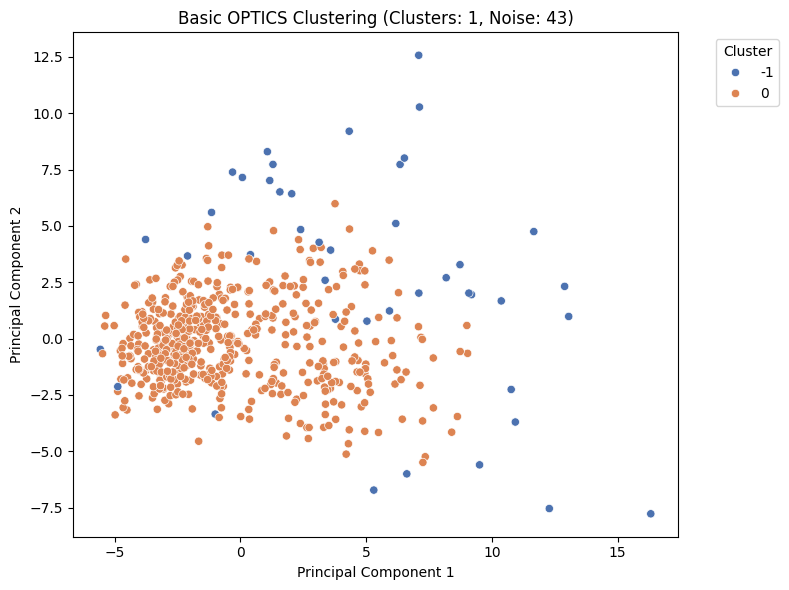

In [ ]:

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='deep')
plt.title(f'Basic OPTICS Clustering (Clusters: {n_clusters_}, Noise: {n_noise_})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()